### Importing Libraries

In [33]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import datetime as dt
import numpy as np
import hvplot.pandas
import panel as pn
import plotly.express as px
pn.extension("plotly")
%matplotlib inline

### Importing Data from CSV Files

In [4]:
xlk_csv = pd.read_csv("../Project_1/xlk.csv", index_col = "Date", infer_datetime_format = True, 
                      parse_dates = True)
xlf_csv = pd.read_csv("../Project_1/XLF.csv", index_col = "Date", infer_datetime_format = True, 
                      parse_dates = True)
vnq_csv = pd.read_csv("../Project_1/VNQ.csv", index_col = "Date", infer_datetime_format = True, 
                      parse_dates = True)
spy_csv = pd.read_csv("../Project_1/spy.csv", index_col = "Date", infer_datetime_format = True, 
                      parse_dates = True)
ibb_csv = pd.read_csv("../Project_1/ibb.csv", index_col = "Date", infer_datetime_format = True, 
                      parse_dates = True)
covid_data = pd.read_csv("United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv", 
                         index_col="submission_date", parse_dates=True)

### Creating Dataframe for ETF Prices Pre-Covid

In [5]:
xlk_pre_covid = xlk_csv.reset_index()
xlk_pre_covid = xlk_pre_covid[0:767]
xlk_pre_covid.columns = ['Date', 'XLK']

xlf_pre_covid = xlf_csv.reset_index()
xlf_pre_covid = xlf_pre_covid[0:767]
xlf_pre_covid.columns = ['Date', 'XLF']
xlf_pre_covid = xlf_pre_covid.drop(columns=['Date'])

vnq_pre_covid = vnq_csv.reset_index()
vnq_pre_covid = vnq_pre_covid[0:767]
vnq_pre_covid.columns = ['Date', 'VNQ']
vnq_pre_covid = vnq_pre_covid.drop(columns=['Date'])

spy_pre_covid = spy_csv.reset_index()
spy_pre_covid = spy_pre_covid[0:767]
spy_pre_covid.columns = ['Date', 'SPY']
spy_pre_covid = spy_pre_covid.drop(columns=['Date'])

ibb_pre_covid = ibb_csv.reset_index()
ibb_pre_covid = ibb_pre_covid[0:767]
ibb_pre_covid.columns = ['Date', 'IBB']
ibb_pre_covid = ibb_pre_covid.drop(columns=['Date'])

pre_covid_concat = pd.concat([xlk_pre_covid, xlf_pre_covid, vnq_pre_covid,
                              spy_pre_covid, ibb_pre_covid], axis = "columns", join = "inner")
pre_covid_concat.set_index(["Date"], inplace = True)
pre_covid_concat.head()

,XLK,XLF,VNQ,SPY,IBB
Date,,,,,
2017-01-03,48.79,23.51,82.80,225.24,90.08
2017-01-04,48.96,23.70,84.01,226.58,92.41
2017-01-05,49.04,23.46,84.28,226.40,92.70
2017-01-06,49.40,23.54,84.29,227.21,93.42
2017-01-09,49.39,23.38,83.53,226.46,94.76


### Creating Dataframe for ETF Prices During Covid

In [6]:
xlk_post_covid = xlk_csv.reset_index()
xlk_post_covid = xlk_post_covid[767:]
xlk_post_covid.columns = ['Date', 'XLK']

xlf_post_covid = xlf_csv.reset_index()
xlf_post_covid = xlf_post_covid[767:]
xlf_post_covid.columns = ['Date', 'XLF']
xlf_post_covid = xlf_post_covid.drop(columns=['Date'])

vnq_post_covid = vnq_csv.reset_index()
vnq_post_covid = vnq_post_covid[767:]
vnq_post_covid.columns = ['Date', 'VNQ']
vnq_post_covid = vnq_post_covid.drop(columns=['Date'])

spy_post_covid = spy_csv.reset_index()
spy_post_covid = spy_post_covid[767:]
spy_post_covid.columns = ['Date', 'SPY']
spy_post_covid = spy_post_covid.drop(columns=['Date'])

ibb_post_covid = ibb_csv.reset_index()
ibb_post_covid = ibb_post_covid[767:]
ibb_post_covid.columns = ['Date', 'IBB']
ibb_post_covid = ibb_post_covid.drop(columns=['Date'])

during_covid_concat = pd.concat([xlk_post_covid, xlf_post_covid, vnq_post_covid,
                              spy_post_covid, ibb_post_covid], axis = "columns", join = "inner")
during_covid_concat.set_index(["Date"], inplace = True)
during_covid_concat.head()

,XLK,XLF,VNQ,SPY,IBB
Date,,,,,
2020-01-22,97.43,30.86,94.98,331.34,120.55
2020-01-23,97.89,30.78,95.78,331.72,119.50
2020-01-24,97.43,30.39,95.45,328.77,116.88
2020-01-27,95.11,29.92,94.99,323.50,116.09
2020-01-28,96.93,30.27,95.37,326.89,117.32


### Creating Covid Cases Dataframe

In [7]:
covid_clean_data = covid_data[["tot_cases","tot_death"]]
covid_really_clean = covid_clean_data.groupby(covid_clean_data.index).sum()
covid_really_clean = covid_clean_data.groupby(covid_clean_data.index).sum()
covid_really_clean.reset_index(inplace = True)
covid_really_clean.columns = ['Date', 'tot_cases', 'tot_death']
covid_really_clean.set_index('Date', inplace=True)
covid_really_clean.head()

,tot_cases,tot_death
Date,,
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,2,0
2020-01-26,5,0


### Concatinating Covid Dataframe with ETF Prices

In [8]:
covid_data_impact = pd.concat([covid_really_clean, during_covid_concat], axis = 'columns',
                              join = 'inner'
                             )
covid_data_impact.head()

,tot_cases,tot_death,XLK,XLF,VNQ,SPY,IBB
Date,,,,,,,
2020-01-22,1,0,97.43,30.86,94.98,331.34,120.55
2020-01-23,1,0,97.89,30.78,95.78,331.72,119.50
2020-01-24,2,0,97.43,30.39,95.45,328.77,116.88
2020-01-27,5,0,95.11,29.92,94.99,323.50,116.09
2020-01-28,5,0,96.93,30.27,95.37,326.89,117.32


## Statistical analysis of ETF's Pre-Covid

#### Percentage Change

In [9]:
pre_covid_pct_change = pre_covid_concat.pct_change().dropna()
pre_covid_pct_change.head()

,XLK,XLF,VNQ,SPY,IBB
Date,,,,,
2017-01-04,0.003484,0.008082,0.014614,0.005949,0.025866
2017-01-05,0.001634,-0.010127,0.003214,-0.000794,0.003138
2017-01-06,0.007341,0.003410,0.000119,0.003578,0.007767
2017-01-09,-0.000202,-0.006797,-0.009016,-0.003301,0.014344
2017-01-10,0.000202,0.002139,-0.008500,0.000000,0.007809


#### Standard Deviation

In [10]:
pre_covid_std = pre_covid_concat.std()
pre_covid_std.head()

XLK    10.516747
XLF     1.948106
VNQ     5.168474
SPY    23.704108
IBB     7.084195
dtype: float64

#### Covariance and Variance of All ETF's Relative to SNP500

In [11]:
pre_covid_xlk_cov = pre_covid_concat['XLK'].rolling(window = 2).cov(pre_covid_concat['SPY']).dropna()
pre_covid_xlf_cov = pre_covid_concat['XLF'].rolling(window = 2).cov(pre_covid_concat['SPY']).dropna()
pre_covid_vnq_cov = pre_covid_concat['VNQ'].rolling(window = 2).cov(pre_covid_concat['SPY']).dropna()
pre_covid_ibb_cov = pre_covid_concat['IBB'].rolling(window = 2).cov(pre_covid_concat['SPY']).dropna()
pre_covid_var = pre_covid_concat['SPY'].rolling(window = 2).var().dropna()
pre_covid_var.head()

Date
2017-01-04    0.89780
2017-01-05    0.01620
2017-01-06    0.32805
2017-01-09    0.28125
2017-01-10    0.00000
Name: SPY, dtype: float64

#### Beta Values for All ETF's

In [12]:
xlk_beta_pre_covid = pre_covid_xlk_cov/pre_covid_var
xlf_beta_pre_covid = pre_covid_xlf_cov/pre_covid_var
vnq_beta_pre_covid = pre_covid_vnq_cov/pre_covid_var
ibb_beta_pre_covid = pre_covid_ibb_cov/pre_covid_var
beta_pre_covid = pd.concat([xlk_beta_pre_covid, xlf_beta_pre_covid, vnq_beta_pre_covid, ibb_beta_pre_covid],
                          axis = 'columns', join = 'inner')
beta_pre_covid.columns = ['Tech', 'Finance', 'Real_Estate', 'BioTech']
beta_pre_covid.head()

,Tech,Finance,Real_Estate,BioTech
Date,,,,
2017-01-04,0.126866,0.141791,0.902985,1.738806
2017-01-05,-0.444444,1.333333,-1.500000,-1.611111
2017-01-06,0.444444,0.098765,0.012346,0.888889
2017-01-09,0.013333,0.213333,1.013333,-1.786667
2017-01-10,-inf,inf,-inf,-inf


#### Sharpe Ratios and Volatility

In [13]:
daily_returns_precovid = pre_covid_concat.pct_change().dropna()
std_pre_covid = pre_covid_concat.std()
volatility = std_pre_covid*np.sqrt(252)
correlation_pre_covid = pre_covid_concat.corr()
correlation_pre_covid_sum = correlation_pre_covid.sum(axis=0).sort_values()
sharpe_ratios_precovid = (daily_returns_precovid.mean()*252) / (daily_returns_precovid.std() * np.sqrt(252))
sharpe_ratios_precovid.sort_values(ascending = False, inplace = True)
sharpe_ratios_precovid

XLK    1.345635
SPY    1.054803
XLF    0.626382
IBB    0.579814
VNQ    0.426498
dtype: float64

## Graphical Representations Pre Covid

### Beta-Plot

In [14]:
pre_covid_beta = beta_pre_covid.hvplot(figsize = (10, 5), title = 'Beta Values Pre-Covid', rot =90
                                       ).opts(ylim=(-200, 200))
pre_covid_beta

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

### Sharpe Ratios Barplot

In [15]:
sharpe_ratios_precovid_graph = sharpe_ratios_precovid.hvplot.bar(figsize = (10, 5),
                                                                 title = "Sharpe Ratios Pre Covid")
sharpe_ratios_precovid_graph

:Bars   [index]   (0)

### Boxplot of Pre Covid Dataframe

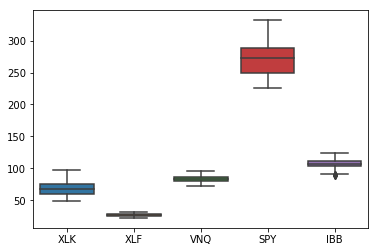

In [16]:
sns.boxplot(data = pre_covid_concat)

## Statistical analysis of ETF's During Covid

#### Percentage Change

In [17]:
pct_change_covid = covid_data_impact.pct_change().dropna()
pct_change_covid.head()

,tot_cases,tot_death,XLK,XLF,VNQ,SPY,IBB
Date,,,,,,,
2020-03-02,2.312500,inf,0.057825,0.051147,0.042712,0.043307,0.048648
2020-03-03,0.471698,0.500000,-0.037976,-0.037567,-0.002306,-0.028632,-0.026712
2020-03-04,0.256410,0.111111,0.042922,0.033086,0.037755,0.042033,0.046890
2020-03-05,0.673469,0.100000,-0.031560,-0.048219,-0.021426,-0.033242,-0.017423
2020-03-06,0.286585,0.090909,-0.021138,-0.034026,-0.017234,-0.016531,-0.012797


#### Covariance and Variance of All ETF's Relative to SNP500

In [18]:
during_covid_xlk_cov = during_covid_concat['XLK'].rolling(window = 2).cov(during_covid_concat['SPY']).dropna()
during_covid_xlf_cov = during_covid_concat['XLF'].rolling(window = 2).cov(during_covid_concat['SPY']).dropna()
during_covid_vnq_cov = during_covid_concat['VNQ'].rolling(window = 2).cov(during_covid_concat['SPY']).dropna()
during_covid_ibb_cov = during_covid_concat['IBB'].rolling(window = 2).cov(during_covid_concat['SPY']).dropna()
during_covid_var = during_covid_concat['SPY'].rolling(window = 2).var().dropna()
during_covid_var.head()

Date
2020-01-23     0.07220
2020-01-24     4.35125
2020-01-27    13.88645
2020-01-28     5.74605
2020-01-29     0.03645
Name: SPY, dtype: float64

#### Beta Values for All ETF's

In [19]:
xlk_beta_covid = during_covid_xlk_cov/during_covid_var
xlf_beta_covid = during_covid_xlf_cov/during_covid_var
vnq_beta_covid = during_covid_vnq_cov/during_covid_var
ibb_beta_covid = during_covid_ibb_cov/during_covid_var
pct_change_covid = covid_really_clean.pct_change()
beta_during_covid = pd.concat([xlk_beta_covid, xlf_beta_covid, vnq_beta_covid, ibb_beta_covid],
                             axis = 'columns', join = 'inner')
beta_during_covid.columns = ['Tech', 'Finance', 'Real_Estate', 'BioTech']
beta_during_covid.head()

,Tech,Finance,Real_Estate,BioTech
Date,,,,
2020-01-23,1.210526,-0.210526,2.105263,-2.763158
2020-01-24,0.155932,0.132203,0.111864,0.888136
2020-01-27,0.440228,0.089184,0.087287,0.149905
2020-01-28,0.536873,0.103245,0.112094,0.362832
2020-01-29,-0.925926,0.185185,1.296296,0.296296


#### Sharpe Ratios and Volatility 

In [20]:
daily_returns_covid = during_covid_concat.pct_change().dropna()
std_during_covid = during_covid_concat.std()
during_volatility = std_during_covid*np.sqrt(252)
correlation_covid = during_covid_concat.corr()
correlation_covid_sum = correlation_covid.sum(axis=0).sort_values()
sharpe_ratios_covid = (daily_returns_covid.mean()*252) / (daily_returns_covid.std() * np.sqrt(252))
sharpe_ratios_covid.sort_values(ascending = False, inplace = True)

## Graphical Representations Pre Covid

### Beta-Plot

In [21]:
during_covid_beta = beta_during_covid.hvplot(figsize = (20, 10), title = 'Beta During Covid')
during_covid_beta

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

### Sharpe Ratios Barplot

In [22]:
sharpe_ratios_bar = sharpe_ratios_covid.hvplot.bar(title = 'Sharpe Ratios During Covid')
sharpe_ratios_bar

:Bars   [index]   (0)

## Concatination of Plots

### Beta Concat

In [23]:
concat_plot = pre_covid_beta * during_covid_beta
concat_plot

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [Date]   (value)

### Sharpe Ratios Concat 

In [25]:
concat_sharpe_ratios = sharpe_ratios_precovid_graph + sharpe_ratios_bar
concat_sharpe_ratios

:Layout
   .Bars.A_0.I  :Bars   [index]   (0)
   .Bars.A_0.II :Bars   [index]   (0)

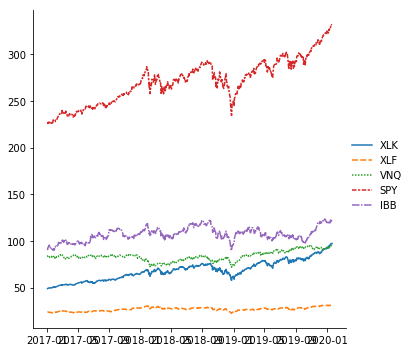

In [31]:
replot_pre_covid = sns.relplot(
    data=pre_covid_concat, kind="line",
    hue="event", style="event"
)
replot_pre_covid

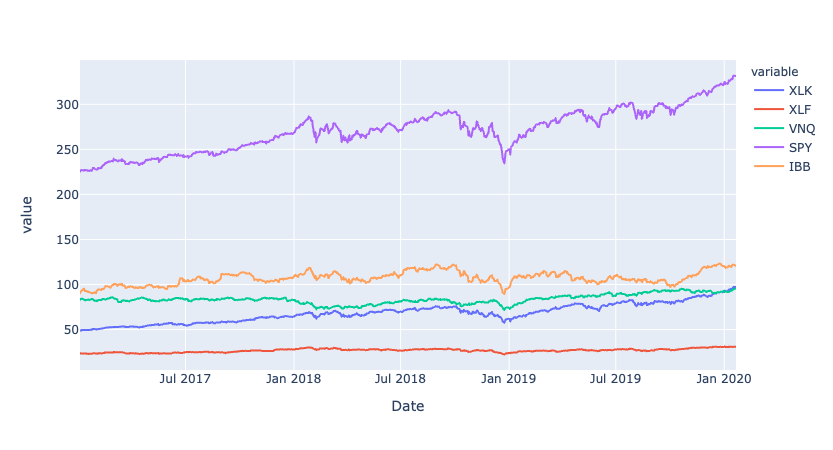

In [49]:
test = px.line(pre_covid_concat)
test

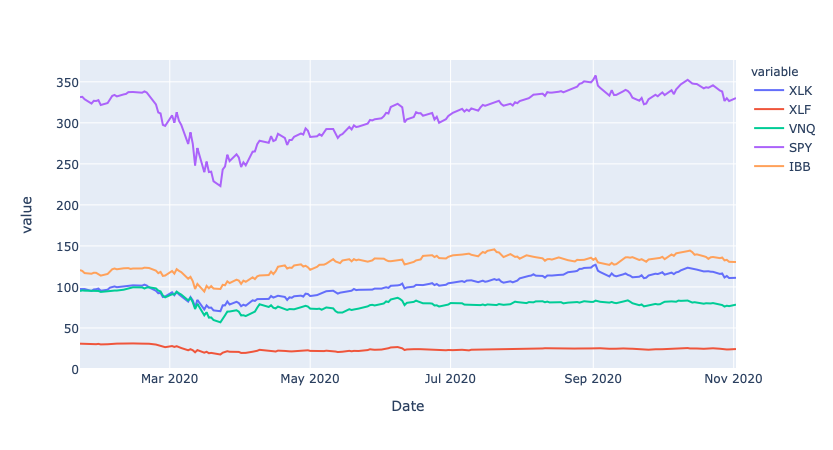

In [46]:
test_2 = px.line(during_covid_concat)
test_2

In [54]:
hv_plots = pre_covid_concat.hvplot()
hv_plots_1 = during_covid_concat.hvplot()
hv_plots_2 = hv_plots * hv_plots_1
hv_plots_2

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [Date]   (value)